<a href="https://colab.research.google.com/github/shahrinsabrina/PythonNumericalProjects/blob/main/Ground_State_Energy_of_the_1D_Quantum_Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Ground State Energy of Harmonic Oscillator by Variational Quantum Monte Carlo Technique

**Sabrina Shahrin Rashid**  
Reg. no: 2016132069  
Assignment – 2, Computational Physics  

---




## Objective
The objective of this project is to estimate the ground state energy of the one-dimensional quantum harmonic oscillator using the Variational Quantum Monte Carlo (VQMC) technique. The method combines the variational principle with Monte Carlo sampling to approximate the lowest possible energy.

## Theory and Background
The Hamiltonian of the one-dimensional harmonic oscillator is given by:

\[
H = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2
\]

According to the variational principle, if we assume a normalized trial wavefunction \( \psi_T(x;\alpha) \) with a variational parameter \( \alpha \), the expectation value of the energy satisfies:

\[
E(\alpha) = \frac{\langle \psi_T | H | \psi_T \rangle}{\langle \psi_T | \psi_T \rangle} \geq E_0
\]

where \( E_0 \) is the true ground state energy.  

We choose a Gaussian trial wavefunction:

\[
\psi_T(x;\alpha) = e^{-\frac{1}{2}\alpha x^2}
\]

The corresponding local energy is derived as:

\[
E_L(x;\alpha) = \frac{1}{2}\alpha + \frac{1}{2}(1 - \alpha^2)x^2
\]

The VQMC method estimates the ground state energy by averaging the local energy over many Monte Carlo samples distributed according to \( |\psi_T(x;\alpha)|^2 \).

## Problem Statement
The problem is to use the Variational Quantum Monte Carlo method to calculate the ground state energy of the harmonic oscillator and find the optimal variational parameter \( \alpha \) that minimizes the energy. The exact ground state energy for comparison is known to be:

\[
E_0 = \frac{1}{2}
\]

## Methodology
First, we define the trial wavefunction and its corresponding probability distribution, which will be sampled using the Metropolis algorithm. A random walk is performed in position space, generating samples distributed according to \( |\psi_T(x;\alpha)|^2 \).  

At each sampled position, the local energy \( E_L(x;\alpha) \) is computed. These values are then averaged to approximate the expectation value of the energy.  

This process is repeated for different values of the variational parameter \( \alpha \). By comparing the calculated average energies, the value of \( \alpha \) that minimizes the energy is identified.  

Finally, the results are visualized with plots showing the estimated energy as a function of \( \alpha \), along with histograms of sampled positions.


In [16]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Define the local energy function
def local_energy(x, alpha):
    return 0.5 * alpha + 0.5 * (1 - alpha**2) * x**2


In [18]:
# Variational Quantum Monte Carlo function using Metropolis sampling
def VQMC(alpha, n_steps=100000, step_size=1.0):
    x = 0.0  # initial position
    energies = []
    acceptance = 0

    for step in range(n_steps):
        # Propose a random move
        x_new = x + np.random.uniform(-step_size, step_size)

        # Acceptance probability
        p = np.exp(-alpha * (x_new**2 - x**2))

        if np.random.rand() < min(1, p):
            x = x_new
            acceptance += 1

        # Record local energy
        energies.append(local_energy(x, alpha))

    return np.mean(energies), np.std(energies)/np.sqrt(n_steps), acceptance/n_steps


In [19]:
# Test the VQMC function for a single alpha
alpha_test = 1.0
E_mean, E_err, acc = VQMC(alpha_test, n_steps=50000)
print(f"Alpha = {alpha_test}, Energy = {E_mean:.4f} ± {E_err:.4f}, Acceptance = {acc:.2f}")


Alpha = 1.0, Energy = 0.5000 ± 0.0000, Acceptance = 0.73


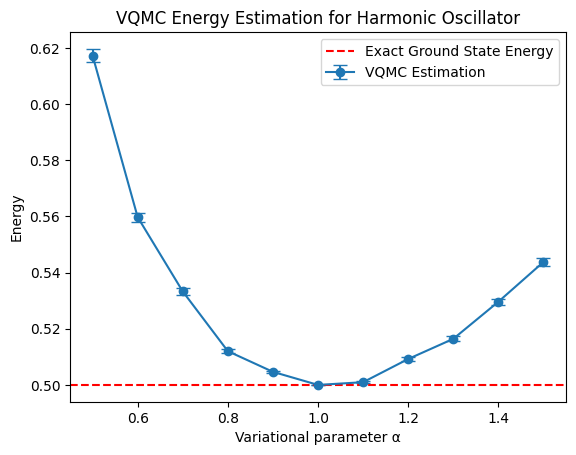

In [20]:
# Scan over a range of alpha values
alpha_values = np.linspace(0.5, 1.5, 11)
energies = []
errors = []

for alpha in alpha_values:
    E_mean, E_err, _ = VQMC(alpha, n_steps=50000)
    energies.append(E_mean)
    errors.append(E_err)

# Plot Energy vs Alpha
plt.errorbar(alpha_values, energies, yerr=errors, fmt='o-', capsize=5, label="VQMC Estimation")
plt.axhline(0.5, color='r', linestyle='--', label="Exact Ground State Energy")
plt.xlabel("Variational parameter α")
plt.ylabel("Energy")
plt.title("VQMC Energy Estimation for Harmonic Oscillator")
plt.legend()
plt.show()


Optimal α ≈ 1.00


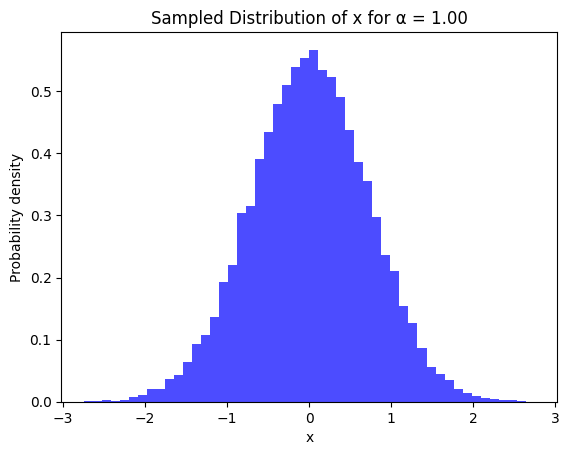

In [21]:
# Histogram of sampled positions for optimal alpha
optimal_alpha = alpha_values[np.argmin(energies)]
print(f"Optimal α ≈ {optimal_alpha:.2f}")

# Sample positions
n_steps = 50000
x = 0.0
positions = []

for step in range(n_steps):
    x_new = x + np.random.uniform(-1, 1)
    p = np.exp(-optimal_alpha * (x_new**2 - x**2))
    if np.random.rand() < min(1, p):
        x = x_new
    positions.append(x)

# Plot histogram
plt.hist(positions, bins=50, density=True, alpha=0.7, color='blue')
plt.title(f"Sampled Distribution of x for α = {optimal_alpha:.2f}")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()


## Results and Discussion
The Variational Quantum Monte Carlo simulation provides estimates of the ground state energy for different values of the variational parameter \( \alpha \). The results show that the minimum energy occurs near \( \alpha = 1 \), which is consistent with the exact analytical solution for the harmonic oscillator.  

The plot of Energy vs. \( \alpha \) demonstrates that the variational method successfully approximates the ground state energy, with the lowest value approaching the exact result of \( E_0 = 0.5 \).  

Additionally, the histogram of sampled positions shows a Gaussian-like distribution centered at \( x = 0 \), which matches the expected probability density of the harmonic oscillator ground state wavefunction.

## Conclusion
The Variational Quantum Monte Carlo technique has been successfully applied to estimate the ground state energy of the harmonic oscillator. The method demonstrates the effectiveness of combining variational principles with stochastic sampling, producing results consistent with the exact quantum mechanical solution.
